In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from modules import operations
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline

In [5]:
data = pd.read_csv('Data/TSLA.csv') #from yahoo website

In [3]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
data['Date']= pd.to_datetime(data['Date'])

In [7]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
data['Close'].describe()

count    1259.000000
mean      145.537898
std       113.468284
min        11.931333
25%        22.608666
50%       147.559998
75%       236.318329
max       409.970001
Name: Close, dtype: float64

Text(0.5, 1.0, 'Close Price over Time')

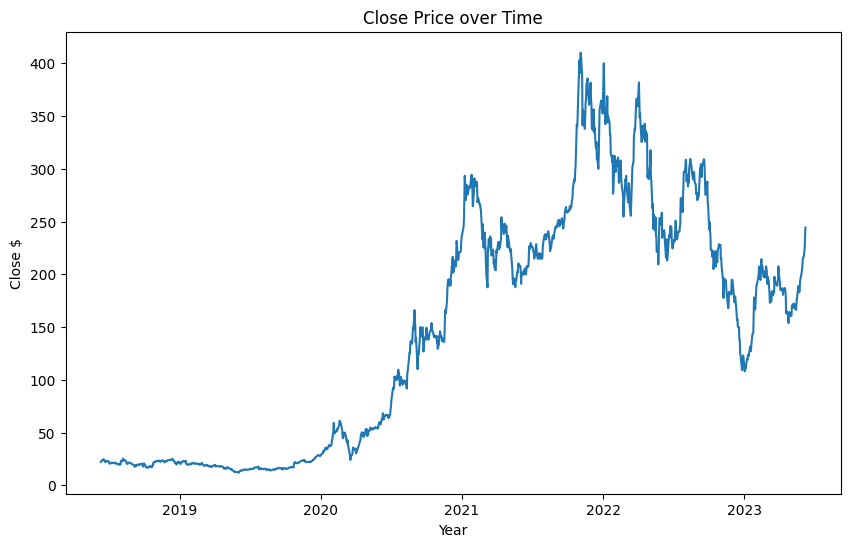

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.xlabel('Year') 
plt.ylabel('Close $') 
  
# displaying the title
plt.title("Close Price over Time")

In [8]:
data['Rolling'] = data['Close'].rolling(100).mean()

In [10]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling
0,2018-06-11,21.500668,22.310667,21.500000,22.139999,22.139999,197752500,NaN
1,2018-06-12,22.980000,23.664667,22.533333,22.851334,22.851334,335211000,NaN
2,2018-06-13,23.114000,23.146667,22.653334,22.985332,22.985332,142047000,NaN
3,2018-06-14,23.175333,23.916668,23.106667,23.848000,23.848000,164715000,NaN
4,2018-06-15,23.589333,24.311333,23.416668,23.878000,23.878000,162724500,NaN
...,...,...,...,...,...,...,...,...
1254,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,180.0074
1255,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,180.9883
1256,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,181.9984
1257,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700,183.1230


Text(0.5, 1.0, 'Close Price + Rolling 100 Day over Time')

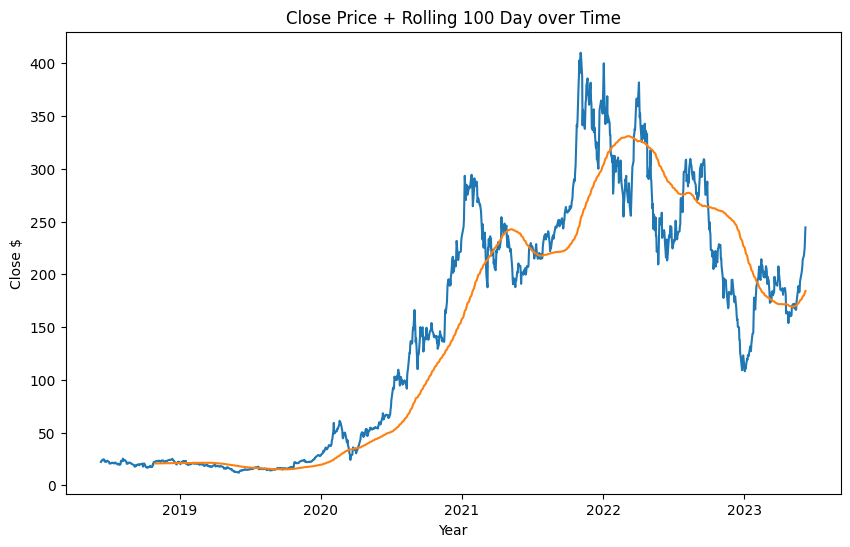

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Close'])
plt.plot(data['Date'],data['Rolling'])
plt.xlabel('Year') 
plt.ylabel('Close $') 
  
# displaying the title
plt.title("Close Price + Rolling 100 Day over Time")

In [12]:
data['Year'] = data['Date'].dt.strftime('%Y')
data_year = data.groupby(['Year'])['Close'].mean()
data_year = data_year.reset_index()

Text(0.5, 1.0, 'Avg Close Price over Time')

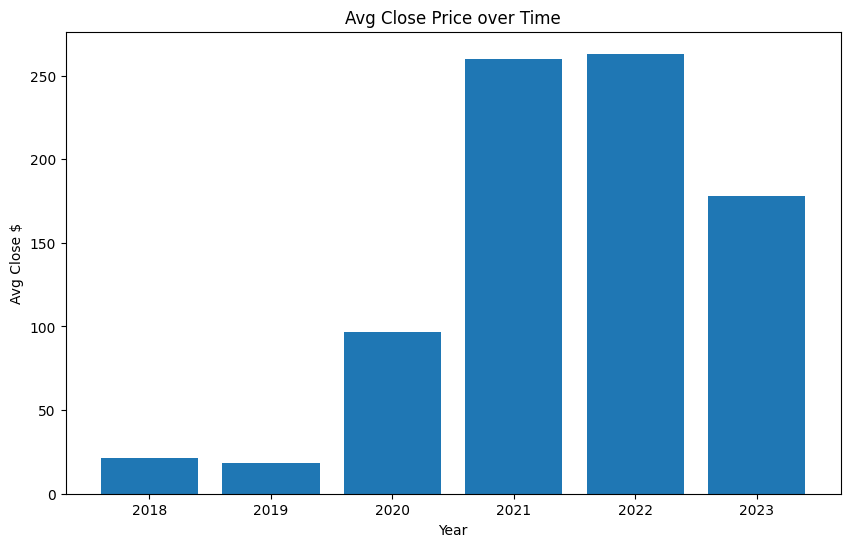

In [13]:
plt.figure(figsize=(10,6))
plt.bar(data_year['Year'],data_year['Close'])
plt.xlabel('Year') 
plt.ylabel('Avg Close $') 
  
# displaying the title
plt.title("Avg Close Price over Time")

In [14]:
# Plotly Graph, might not show in Github

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])


fig.update_layout(title = 'Daily Chart')
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Close $")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [10]:
data['Return2'][0]

nan

The candlestick chart is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.

In [22]:
data['Return'] = np.nan





# Initialize an empty list to store percentage changes
percentage_changes = []

# Iterate through the list starting from the second element
for i in range(0, len(data['Close'])):
    if i == 0:
        percentage_changes.append(np.nan)
    else:
        current_element = data['Close'][i]
        previous_element = data['Close'][i - 1]
        
        # Calculate percentage change and append to the new list
        percentage_change = operations.returns(current_element,previous_element)
        percentage_changes.append(percentage_change)

data['Return'] = percentage_changes

# could use data['Close'].pct_change()


In [24]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling,Return2,test
0,2018-06-11,21.500668,22.310667,21.500000,22.139999,22.139999,197752500,NaN,NaN,NaN
1,2018-06-12,22.980000,23.664667,22.533333,22.851334,22.851334,335211000,NaN,0.032129,0.032129
2,2018-06-13,23.114000,23.146667,22.653334,22.985332,22.985332,142047000,NaN,0.005864,0.005864
3,2018-06-14,23.175333,23.916668,23.106667,23.848000,23.848000,164715000,NaN,0.037531,0.037531
4,2018-06-15,23.589333,24.311333,23.416668,23.878000,23.878000,162724500,NaN,0.001258,0.001258
...,...,...,...,...,...,...,...,...,...,...
1254,2023-06-05,217.800003,221.289993,214.520004,217.610001,217.610001,151143100,180.0074,0.017012,0.017012
1255,2023-06-06,216.139999,221.910004,212.529999,221.309998,221.309998,146911600,180.9883,0.017003,0.017003
1256,2023-06-07,228.000000,230.830002,223.199997,224.570007,224.570007,185710800,181.9984,0.014731,0.014731
1257,2023-06-08,224.220001,235.229996,223.009995,234.860001,234.860001,164489700,183.1230,0.045821,0.045821


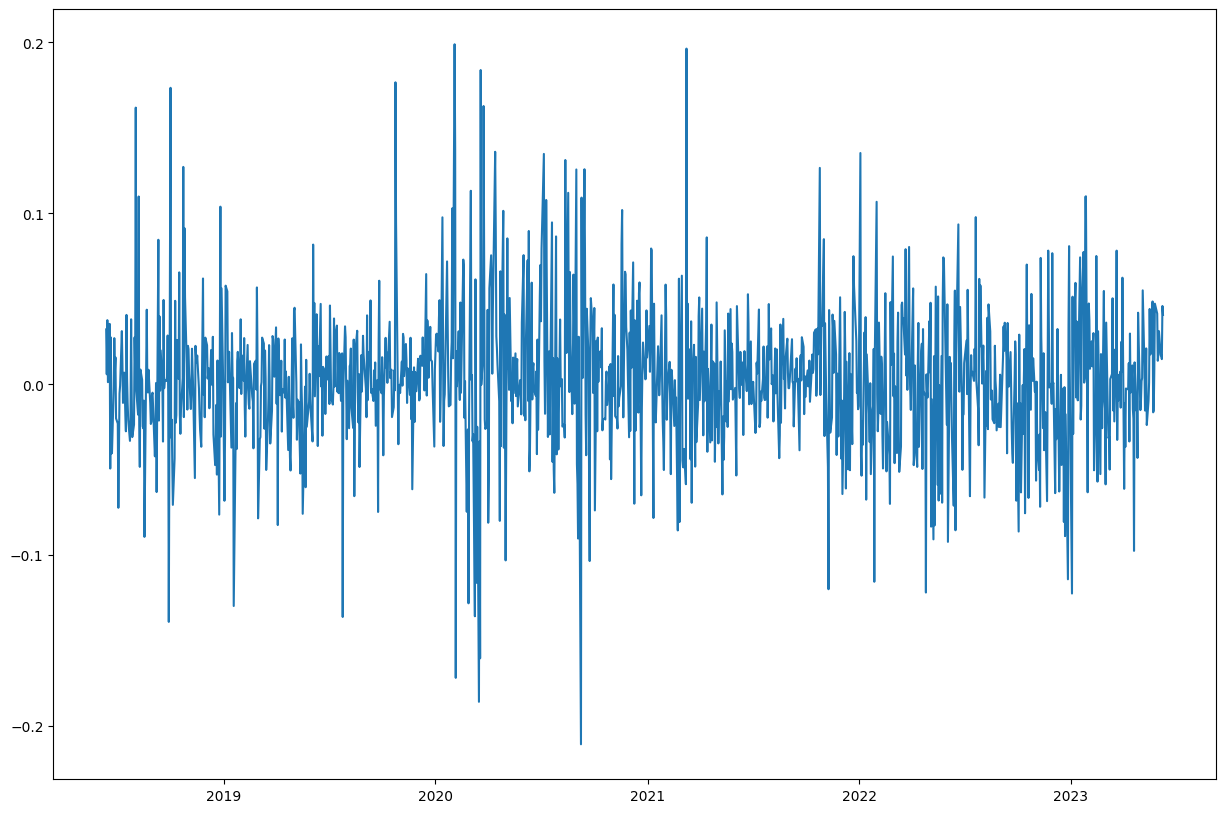

In [16]:
# Plotly Graph, might not show in Github
plt.figure(figsize=(15,10))
plt.plot(data['Date'], data['Return'])


In [3]:
from modules import operations

ops = operations.Operations
# Create a list of numbers
original_list = [10, 15, 20, 25, 30]

# Initialize an empty list to store percentage changes
percentage_changes = []

# Iterate through the list starting from the second element
for i in range(1, len(original_list)):
    current_element = original_list[i]
    previous_element = original_list[i - 1]
    
    # Calculate percentage change and append to the new list
    percentage_change = ops.returns(current_element,previous_element)
    percentage_changes.append(percentage_change)

# Print the resulting list of percentage changes
print(percentage_changes)


[0.5, 0.3333333333333333, 0.25, 0.2]
